In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [114]:
!pip install wordcloud

In [87]:
news=pd.read_csv('train_news.csv')
news.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [88]:
news.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [89]:
news.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [90]:
#Repalce the null values with no headline avilable
news['headline'] = news['headline'].replace(np.NaN, 'no headlin available')

In [91]:
#Replace the null values with news articale is not avilable
news['news'] = news['news'].replace(np.NaN, 'news artical is not available')

In [92]:
#Count the different values 
news.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [93]:
#Percentage of not fake and fake news
print("Right News :=> ",round(len(news[news['label']==0])/len(news.label),2)*100,'%')
print("Fake News :=> ",round(len(news[news['label']==1])/len(news.label),2)*100,'%')

Right News :=>  50.0 %
Fake News :=>  50.0 %


In [94]:
# length of the headline with len() function and store in new features headline length. It helps to differentiate each and
# every data.
news['headline_length'] = news.headline.str.len()
news.head()

,headline,written_by,news,label,headline_length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28


In [95]:
# Convert all the data in a particular case. I have converted all in lower case
news['headline'] = news.headline.str.lower()
news.head()

,headline,written_by,news,label,headline_length
0,ethics questions dogged agriculture nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84
1,u.s. must dig deep to stop argentina’s lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72
2,cotton to house: ’do not walk the plank and vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100
3,"paul lepage, besieged maine governor, sends co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100
4,a digital 9/11 if trump wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28


In [96]:
# I have removed approximately all regular expressions available in the headline feature.
news['headline'] = news['headline'].str.replace(r'[^\w\d\s]', ' ')
news['headline'] = news['headline'].str.replace(r'\s+', ' ')
news['headline'] = news['headline'].str.replace(r'^\s+|\s+?$', ' ')
news['headline'] = news['headline'].str.replace(r'\d+(\.\.d+)?','num')

In [97]:
news.head()

,headline,written_by,news,label,headline_length
0,ethics questions dogged agriculture nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84
1,u s must dig deep to stop argentina s lionel m...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72
2,cotton to house do not walk the plank and vote...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100
3,paul lepage besieged maine governor sends conf...,Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100
4,a digital num num if trump wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28


In [98]:
# I have dropped the written_by feature because it does not affect here the label feature.
news.drop('written_by', axis=1, inplace=True)

In [99]:
#length of the news with len() function and store in new features news_length. It helps to differentiate each and
# every data.
news['news_length'] = news.news.str.len()
news.head()

,headline,news,label,headline_length,news_length
0,ethics questions dogged agriculture nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936
1,u s must dig deep to stop argentina s lionel m...,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112
2,cotton to house do not walk the plank and vote...,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425
3,paul lepage besieged maine governor sends conf...,"AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516
4,a digital num num if trump wins,Finian Cunningham has written extensively on...,1,28,9164


In [100]:
# Convert all the data in a particular case. I have converted all in lower case
news['news'] = news.news.str.lower()
news.head()

,headline,news,label,headline_length,news_length
0,ethics questions dogged agriculture nominee as...,"washington — in sonny perdue’s telling, geo...",0,84,7936
1,u s must dig deep to stop argentina s lionel m...,houston — venezuela had a plan. it was a ta...,0,72,6112
2,cotton to house do not walk the plank and vote...,"sunday on abc’s “this week,” while discussing ...",0,100,425
3,paul lepage besieged maine governor sends conf...,"augusta, me. — the beleaguered republican g...",0,100,6516
4,a digital num num if trump wins,finian cunningham has written extensively on...,1,28,9164


In [101]:
#I have removed approximately all regular expressions available in the news feature.
news['news'] = news['news'].str.replace(r'^\w\d\s', ' ')
news['news'] = news['news'].str.replace(r'\s+', ' ')
news['news'] = news['news'].str.replace(r'^\s+|\s+?',' ')
news['news'] = news['news'].str.replace(r'£|\$', 'dollers')
news['news'] = news['news'].str.replace(r'\d+(\.\.\d+)?', 'numbrs')

In [102]:
import nltk 
import string
from nltk.corpus import stopwords

stop_word = set(stopwords.words('english'))

In [103]:
# I have removed all stopwords from headline feature.
news['headline'] = news['headline'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_word))

In [104]:
# After removing the stop word length of the headline feature, I have stored in the new feature name is clean_headline_length.
news['clean_headline_length'] = news.headline.str.len()
news.head()

,headline,news,label,headline_length,news_length,clean_headline_length
0,ethics questions dogged agriculture nominee ge...,"washington — in sonny perdue’s telling, georgi...",0,84,7936,75
1,u must dig deep stop argentina lionel messi ne...,houston — venezuela had a plan. it was a tacti...,0,72,6112,58
2,cotton house walk plank vote bill cannot pass ...,"sunday on abc’s “this week,” while discussing ...",0,100,425,62
3,paul lepage besieged maine governor sends conf...,"augusta, me. — the beleaguered republican gove...",0,100,6516,87
4,digital num num trump wins,finian cunningham has written extensively on ...,1,28,9164,26


In [108]:
#I have removed all stopwords from headline feature.
news['news'] = news['news'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_word))

In [109]:
#After removing the stop word length of the news feature, I have stored in the new feature name is clean_news_length.
news['clean_news_length'] = news.news.str.len()
news.head()

,headline,news,label,headline_length,news_length,clean_headline_length,clean_news_length
0,ethics questions dogged agriculture nominee ge...,"washington — sonny perdue’s telling, georgians...",0,84,7936,75,5943
1,u must dig deep stop argentina lionel messi ne...,"houston — venezuela plan. tactical approach, d...",0,72,6112,58,4539
2,cotton house walk plank vote bill cannot pass ...,"sunday abc’s “this week,” discussing republica...",0,100,425,62,310
3,paul lepage besieged maine governor sends conf...,"augusta, me. — beleaguered republican governor...",0,100,6516,87,4797
4,digital num num trump wins,finian cunningham written extensively internat...,1,28,9164,26,7027


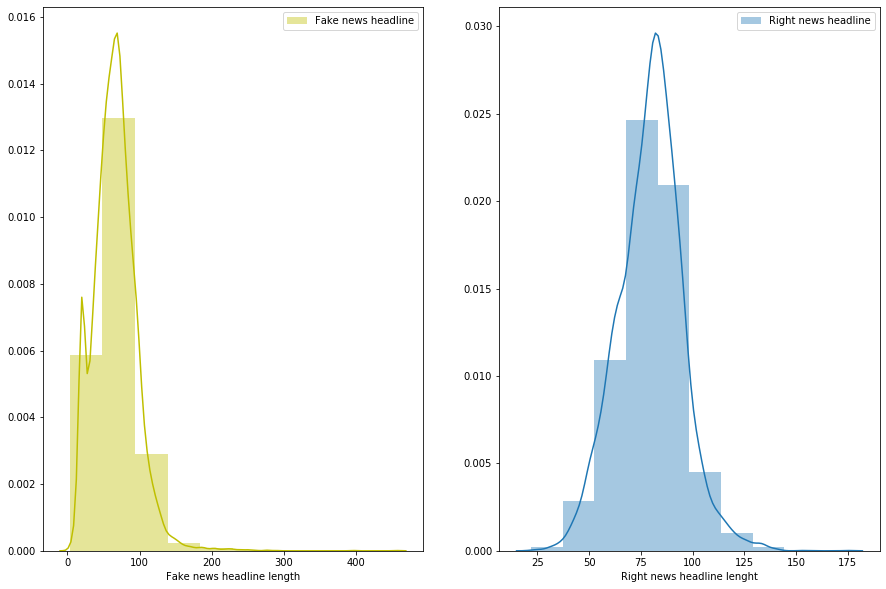

In [110]:
# Ploting the EDA
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(news[news['label']==1]['headline_length'],bins=10,ax=ax[0],label='Fake news headline',color='y')
ax[0].set_xlabel('Fake news headline length')
ax[0].legend()

sns.distplot(news[news['label']==0]['headline_length'],bins=10,ax=ax[1],label='Right news headline')
ax[1].set_xlabel('Right news headline lenght')
ax[1].legend()

plt.show()

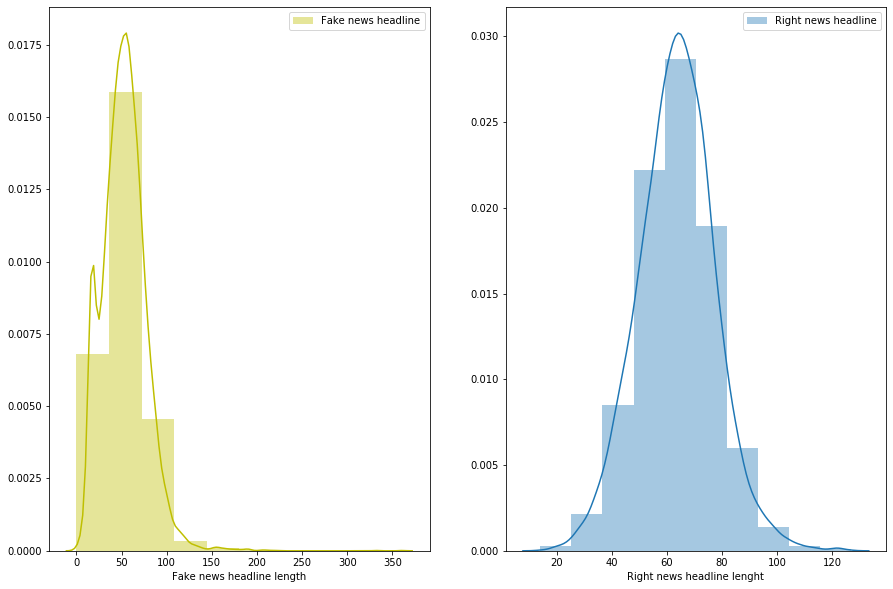

In [111]:
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(news[news['label']==1]['clean_headline_length'],bins=10,ax=ax[0],label='Fake news headline',color='y')
ax[0].set_xlabel('Fake news headline length')
ax[0].legend()

sns.distplot(news[news['label']==0]['clean_headline_length'],bins=10,ax=ax[1],label='Right news headline')
ax[1].set_xlabel('Right news headline lenght')
ax[1].legend()

plt.show()

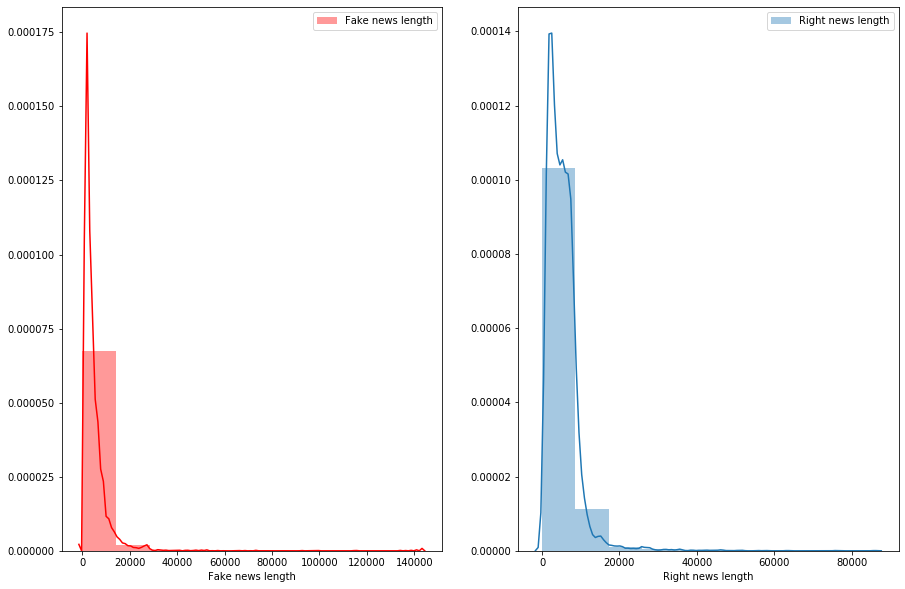

In [112]:
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(news[news['label']==1]['news_length'],bins=10,ax=ax[0],label='Fake news length',color='r')
ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(news[news['label']==0]['news_length'],bins=10,ax=ax[1],label='Right news length')
ax[1].set_xlabel('Right news length')
ax[1].legend()

plt.show()

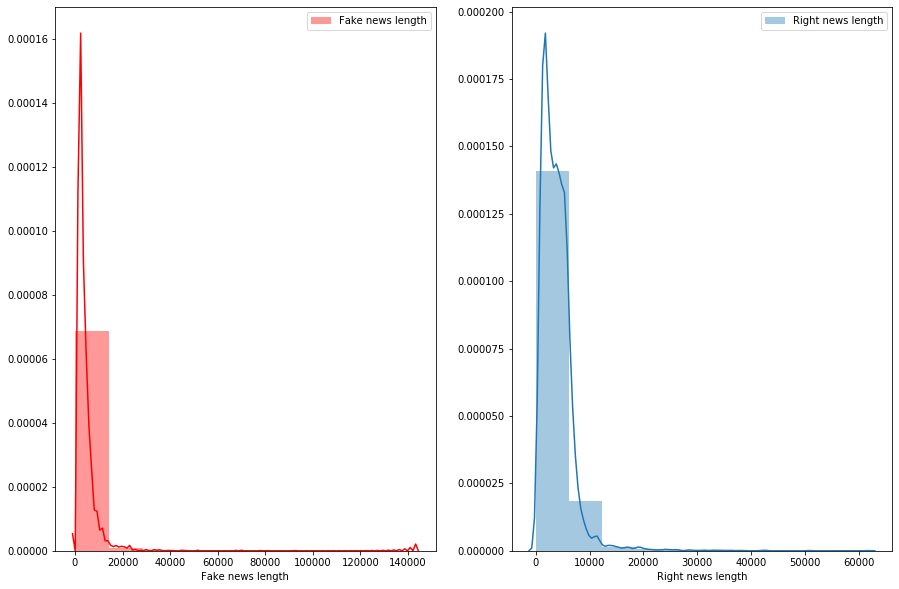

In [113]:
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(news[news['label']==1]['clean_news_length'],bins=10,ax=ax[0],label='Fake news length',color='r')
ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(news[news['label']==0]['clean_news_length'],bins=10,ax=ax[1],label='Right news length')
ax[1].set_xlabel('Right news length')
ax[1].legend()

plt.show()

In [115]:
# import for showing the word in visual form
from wordcloud import WordCloud

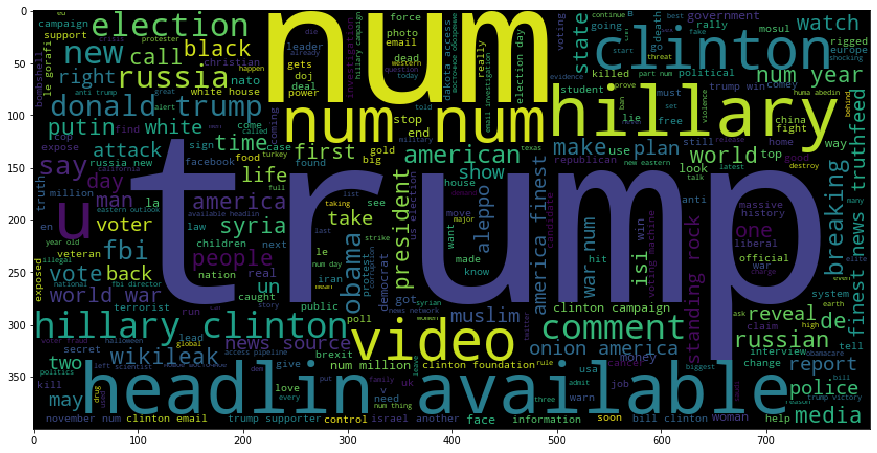

In [119]:
fake = news['headline'][news['label']==1]
fake_words = WordCloud(height=400, width=800, max_words=300, background_color='black').generate(' '.join(fake))

plt.figure(figsize=(15,10))
plt.imshow(fake_words)
plt.show()

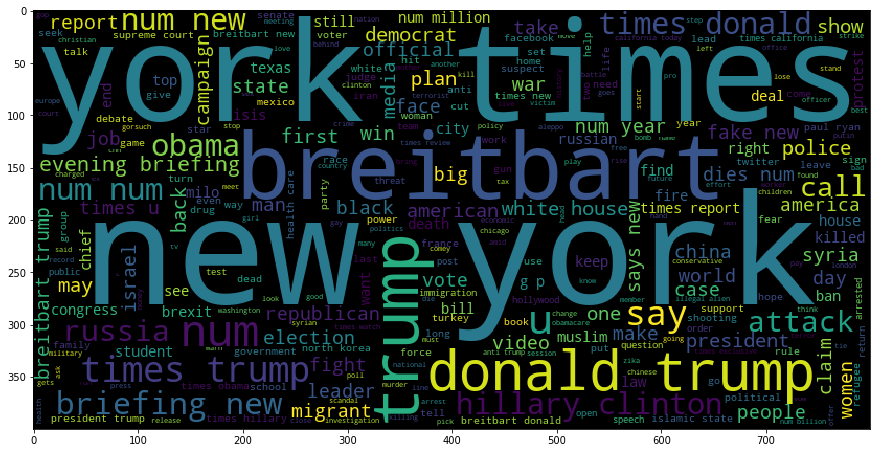

In [120]:
Right = news['headline'][news['label']==0]
Right_word = WordCloud(height=400, width=800, max_words=300, background_color='black').generate(' '.join(Right))

plt.figure(figsize=(15,10))
plt.imshow(Right_word)
plt.show()

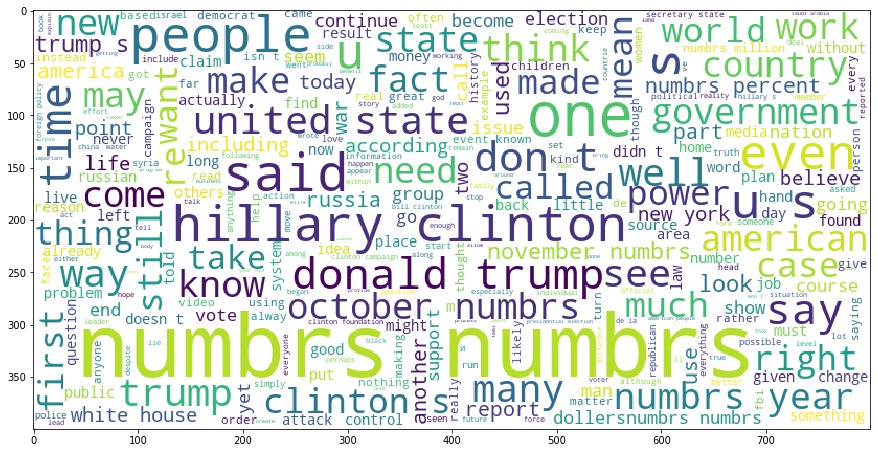

In [121]:
fake = news['news'][news['label']==1]
fake_words = WordCloud(height=400, width=800, max_words=300, background_color='white').generate(' '.join(fake))

plt.figure(figsize=(15,10))
plt.imshow(fake_words)
plt.show()

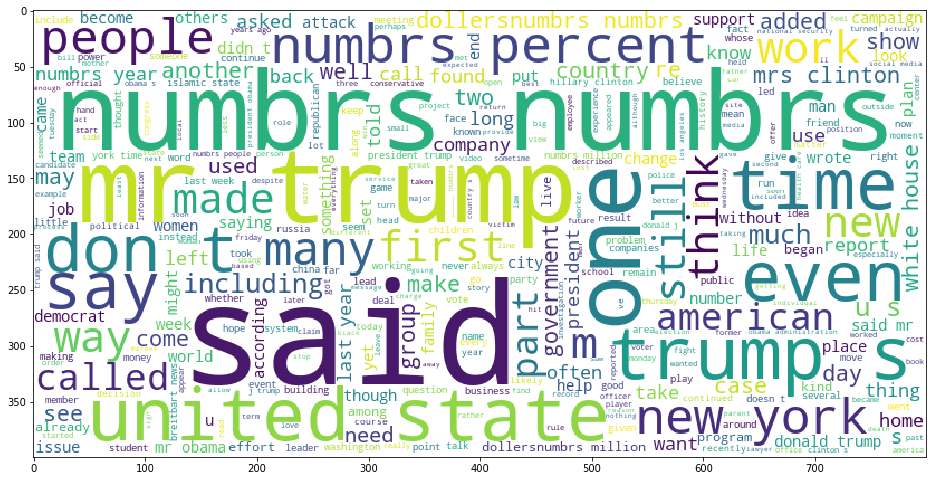

In [122]:
Right = news['news'][news['label']==0]
Right_words = WordCloud(height=400, width=800, max_words=500, background_color='white').generate(' '.join(Right))

plt.figure(figsize=(16,12))
plt.imshow(Right_words)
plt.show()

In [123]:
# For vectrization i have used the Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [125]:
news.drop('headline', axis=1, inplace=True)

In [126]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(news['news'])

In [128]:
x=feature
y=news['label']

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [130]:
mnb, dtc, knn, rfc = MultinomialNB(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()

In [131]:
mnb.fit(x_train, y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test, predmnb))
print(classification_report(y_test, predmnb))

0.8542307692307692
[[2556   19]
 [ 739 1886]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2575
           1       0.99      0.72      0.83      2625

    accuracy                           0.85      5200
   macro avg       0.88      0.86      0.85      5200
weighted avg       0.88      0.85      0.85      5200



In [132]:
dtc.fit(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.885576923076923
[[2297  278]
 [ 317 2308]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2575
           1       0.89      0.88      0.89      2625

    accuracy                           0.89      5200
   macro avg       0.89      0.89      0.89      5200
weighted avg       0.89      0.89      0.89      5200



In [133]:
knn.fit(x_train, y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.5521153846153846
[[ 249 2326]
 [   3 2622]]
              precision    recall  f1-score   support

           0       0.99      0.10      0.18      2575
           1       0.53      1.00      0.69      2625

    accuracy                           0.55      5200
   macro avg       0.76      0.55      0.43      5200
weighted avg       0.76      0.55      0.44      5200



In [134]:
rfc.fit(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.8403846153846154
[[2351  224]
 [ 606 2019]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2575
           1       0.90      0.77      0.83      2625

    accuracy                           0.84      5200
   macro avg       0.85      0.84      0.84      5200
weighted avg       0.85      0.84      0.84      5200



In [138]:
from sklearn.externals import joblib
joblib.dump(dtc,'FackeNewsProject.obj')

['FackeNewsProject.obj']